Recognize optical character using ANN

# Optical Character Recognition

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [15]:
# importing dataset
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [23]:
x_train_full.shape #3d array - image data

# 60,000 training images and labels
# 10,000 test images and labels

(60000, 28, 28)

In [22]:
y_train_full.shape #1d array image labels

(60000,)

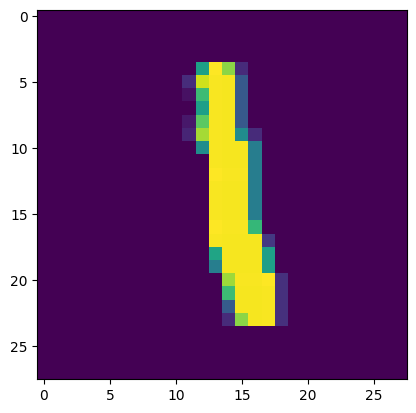

In [17]:
plt.imshow(x_train_full[6])

In [18]:
# feature scaling
x_train_n = x_train_full / 255. #It scales all pixel values from 0–255 → 0–1 128 becomes 0.5 → medium gray
x_test_n = x_test / 255.

In [19]:
# Train_Valid_Test Split
x_valid, x_train = x_train_n[:6000],x_train_n[6000:] #your training data is x_train_n[6000:] (6000 to the end), and your validation data is x_train_n[:6000] (the first 6000).
y_valid, y_train = y_train_full[:6000],y_train_full[6000:]
x_test = x_test_n

Training data: 54,000 samples

Validation data: 6,000 samples

Test data: 10,000 samples

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

# Random processes in machine learning can lead to slight variations
# in results each time the code is run, especially with neural networks.
# Setting the seed helps ensure that these variations don't affect the outcomes.
# anyone runs the code will get same output..this 2 lines actualy set a seed for random number generator..means once random number generated
#everytime same random num generated

In [24]:
# Model Building
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28])) #convert and add 2d img to 1d arr form for model train

model.add(keras.layers.Dense(200,activation='relu'))

model.add(keras.layers.Dense(100,activation='relu'))


model.add(keras.layers.Dense(10,activation='softmax')) #output layer 10 neurons are used because you are classifying the MNIST digits, which have 10 classes (0 to 9).


#activation='relu' specifies the activation function used in this layer.
# ReLU (Rectified Linear Unit) is a common activation function,
#  and it helps the model learn non-linear relationships in the data.
#   It outputs 0 if the input is negative and the input itself if it's positive.

#  Softmax converts the output into probabilities, with each neuron’s
#  output representing the probability that the input image belongs to that class.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(
    loss='sparse_categorical_crossentropy',  # How to measure error
    metrics=['accuracy'],                   # What to track during training
    optimizer='sgd'                         # How to learn and update
)


#spare = all intergers 0-9 and not only encoded 0 1

In [26]:
# model training
model_r = model.fit(x_train,y_train,epochs=60,
                         validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7053 - loss: 1.0736 - val_accuracy: 0.9107 - val_loss: 0.3155
Epoch 2/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9086 - loss: 0.3196 - val_accuracy: 0.9283 - val_loss: 0.2501
Epoch 3/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9259 - loss: 0.2564 - val_accuracy: 0.9397 - val_loss: 0.2145
Epoch 4/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9369 - loss: 0.2173 - val_accuracy: 0.9467 - val_loss: 0.1889
Epoch 5/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9457 - loss: 0.1892 - val_accuracy: 0.9508 - val_loss: 0.1698
Epoch 6/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9525 - loss: 0.1678 - val_accuracy: 0.9547 - val_loss: 0.1550
Epoch 7/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9572 - loss: 0.1509 - val_accuracy: 0.9583 - val_loss: 0.1434
Epoch 8/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9613 - loss: 0.1370 -

In [27]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0915


[0.07749252021312714, 0.9768999814987183]

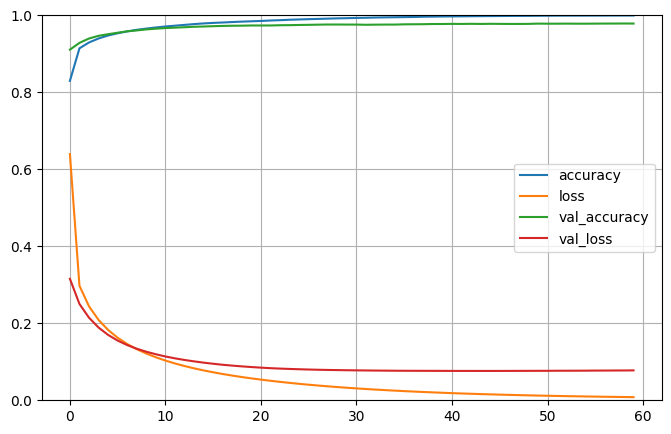

In [33]:
# Val-loss
history = pd.DataFrame( model_r.history)

history.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Restricts the y-axis between 0 and 1
plt.show()

In [29]:
# predicting first five Digits select 5 first out of 10000 samples
x_new=x_test[:5]

In [30]:
y_proba = model.predict(x_new)
y_proba.round(2) #roundoff

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
predict_x = model.predict(x_new)
classes_x=np.argmax(predict_x,axis=1) #np.argmax(...) finds the index of the highest probability in each prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [32]:
# Output
classes_x

array([7, 2, 1, 0, 4])